<a href="https://colab.research.google.com/github/Faraz-NIT/Fake-News-Detection-LSTM/blob/main/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

# ***Fake News classification using Tensorflow*** 
**Faraz Akhtar 2018UGEC040 NIT JSR**

*   First we take the required data in two pandas dataframe real and fake.
*   Data is visualised(countplots, word clouds and value counts) so as to get insights on what is to be cleaned.
*   A new datframe is created with class column 0 for fake and 1 for real.
* A word2vec model is created and text data is tokenized.
* Then we employ a model in Tensorflow using LSTM , Embedding and Dense layers.
* Model is trained for 6 epovhs with accuracy of 99%





In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [5]:
fake=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


 ***DATA VISUALISATION***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


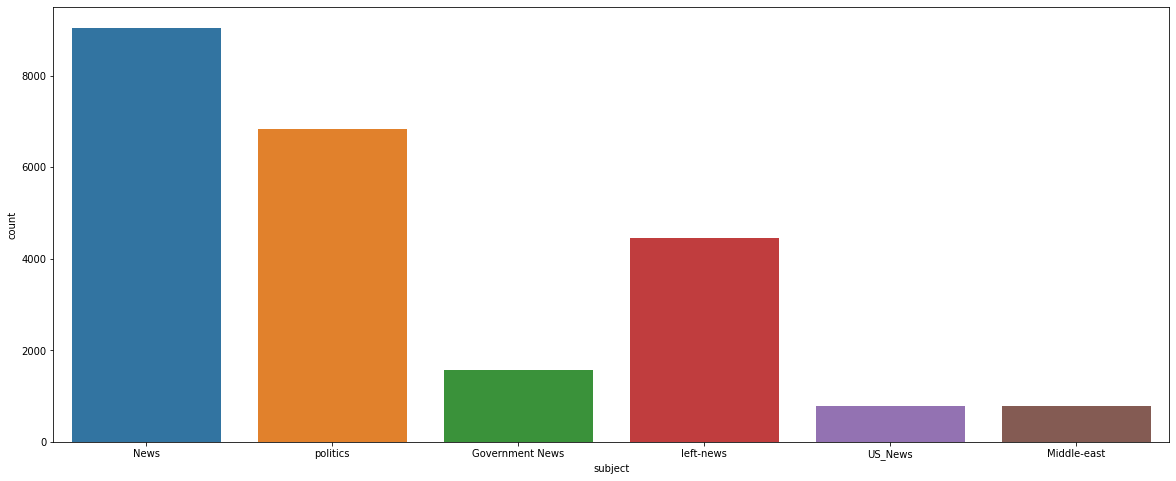

In [9]:
plt.figure(figsize=(20,8))
sns.countplot('subject',data=fake)

In [11]:
text=' '.join(fake['text'].tolist())

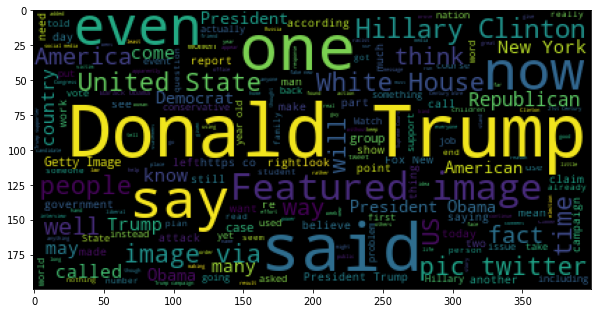

In [15]:
world=WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(world)

REAL NEWS


In [17]:
real=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [18]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [21]:
textReal=' '.join(real['text'].tolist())

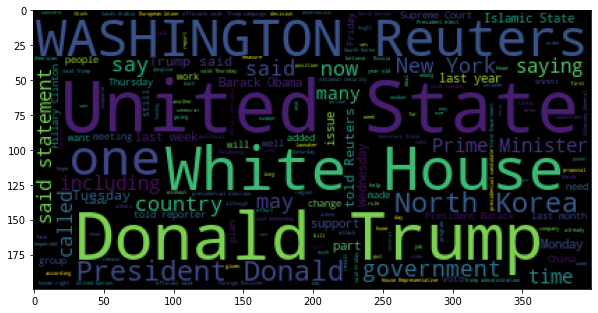

In [22]:
worldReal=WordCloud().generate(textReal)
plt.figure(figsize=(10,10))
plt.imshow(worldReal)

***Insights from Real News data:***


*   From word cloud we see refrences to credible sources like Washington Post,Reuters etc.
*   Most likely the news was given with refrences which is a great signt for it to be real.



In [35]:
unknown=[]
for index,row in enumerate(real.text.values):
  try:
    record=row.split('-',maxsplit=1)
    record[1]
    assert (len(record[0])<120)
  except:
    unknown.append(index)


In [36]:
len(unknown)

221

In [34]:
real=real.drop(8970,axis=0)

In [37]:
real.iloc[unknown]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [38]:
publisher=[]
temp_txt=[]
for index,row in enumerate(real.text.values):
  if index in unknown:
    temp_txt.append(row)
    publisher.append('Unknown')
  else:
    record=row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    temp_txt.append(record[1].strip())
    


In [39]:
real['publisher']=publisher
real['text']=temp_txt

In [40]:
real.shape

(21416, 5)

In [45]:
empty_fakes=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [46]:
fake.iloc[empty_fakes]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [47]:
real['text']=real['title']+' '+real['text']
fake['text']=fake['title']+' '+fake['text']

In [48]:
real['text']=real['text'].apply(lambda x:str(x).lower())
fake['text']=fake['text'].apply(lambda x:str(x).lower())

In [49]:
real['class']=1
fake['class']=0


In [50]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [51]:
fake.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [52]:
real=real[['text','class']]
fake=fake[['text','class']]

In [53]:
real.sample(10)

,text,class
5247,republicans will fail in obamacare repeal bid:...,1
1499,white house's cohn says now sees more than 3 p...,1
13875,french minister believes banks had 'good reaso...,1
8138,globally aligning derivatives rules dominates ...,1
2455,ryan assures u.s. senate republicans on skinny...,1
18997,eu's juncker hails macron speech as 'very euro...,1
6300,factbox: global carmakers' operations in mexic...,1
2215,trump says will speak with china's xi on north...,1
5926,qatar airways issues advisory for u.s.-bound t...,1
1121,u.s. epa to shrink response time for permit re...,1


In [54]:
data=real.append(fake,ignore_index=True)

In [55]:
data.sample(10)

,text,class
29923,terry schiavo’s husband is livid that jeb bus...,0
42594,every u.s. citizen taken hostage in iran to be...,0
22926,trump displays incredible ignorance yet again...,0
28897,obama absolutely rips the gop’s ‘vulgar and d...,0
18526,uk still hopeful of moving eu talks onto futur...,1
464,tax trigger idea for senate tax bill swiftly d...,1
24006,fox news mocked into oblivion after this f*ck...,0
31816,greg gutfeld scores a priceless tv moment…wear...,0
23398,trump’s ‘deportation force’ storms unarmed le...,0
23104,ivanka trump attends women’s panel in germany...,0


In [64]:
re.sub('[^A-Za-z0-9 ]+', '', "Faraz$$$%Tbjjj#%$%$   HY")

'FarazTbjjj   HY'

In [65]:
data['text']=data['text'].apply(lambda x:re.sub('[^A-Za-z0-9 ]+', '',x))

In [66]:
data.sample(9)

,text,class
13462,britains us ambassador discussed trump retweet...,1
1795,supreme court justice temporarily preserves tr...,1
16248,fired mexico prosecutor drops bid to fight dis...,1
38304,boom its payback time for gungrabbing gov gop ...,0
8586,us air force asks industry for proposals to re...,1
14456,german parties regroup for lastditch coalition...,1
9396,senators urge house to move on aviation securi...,1
22238,trump campaign manager was in debt to shady r...,0
14984,death toll in irans western province quake rea...,1


In [67]:
import gensim

In [68]:
y=data['class'].values

In [70]:
Y=[d.split() for d in data['text'].tolist()]

In [71]:
print(Y[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [72]:
D=100
word2vec=gensim.models.Word2Vec(sentences=Y,size=D,window=10,min_count=1)

In [73]:
len(word2vec.wv.vocab)

231817

In [74]:
word2vec.wv['india']

array([ 1.7891090e+00,  1.0525615e+00,  1.0699357e+00, -1.3966531e+00,
        2.4536421e+00, -9.3453008e-01,  1.0524952e+00,  4.0959981e-01,
       -4.4642463e+00, -3.2169855e+00,  1.7985458e+00, -2.3681562e+00,
       -1.3584040e+00,  4.1946993e+00, -7.3283201e-01, -4.2394552e+00,
       -2.6407251e-01, -3.7964551e+00, -1.3204455e-01, -6.2248361e-04,
       -2.3176651e+00, -9.3160927e-01,  1.2934180e+00, -2.3601149e-01,
        1.1518956e-01,  1.9490255e+00,  1.5257264e+00,  3.4047084e+00,
        1.6726791e+00,  3.6958867e-01,  2.5126499e-01,  2.3734882e+00,
        1.7185260e+00,  5.7488209e-01, -4.8606774e-01,  4.4468448e-01,
        1.0199068e+00,  1.0232824e+00,  2.0168152e+00, -7.9706562e-01,
        8.5275698e-01, -3.8568977e-01,  2.5843909e+00,  1.2252597e+00,
        1.4115160e+00,  5.5963248e-01, -2.6540372e+00, -9.2857748e-01,
        1.9549075e+00,  2.4695039e+00,  7.3938429e-01, -2.6222840e-01,
       -3.2961466e+00, -1.4687302e+00,  4.2363161e-01, -1.5797395e-01,
      

In [75]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(Y)

In [76]:
Y=tokenizer.texts_to_sequences(Y)

In [78]:
#tokenizer.word_index

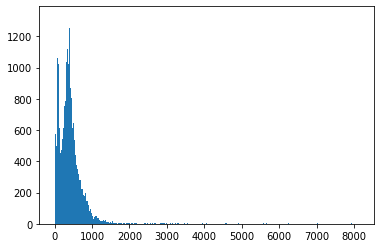

In [81]:
plt.hist([len(x) for x in Y], bins=700)
plt.show()

In [83]:
nos=np.array([len(x) for x in Y])
len(nos[nos>1000])

1584

In [85]:
maxlen=1000
Y=pad_sequences(Y,maxlen=maxlen)

In [86]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [90]:
def get_weight(model):
  matrix=np.zeros((vocab_size,100))
  for word,i in vocab.items():
    matrix[i]=model.wv[word]
  return matrix

In [91]:
embedding_vectors=get_weight(word2vec)

In [92]:
embedding_vectors.shape

(231818, 100)

# **MODEL**

In [94]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=100,weights=[embedding_vectors],input_length=maxlen,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         23181800  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 23,299,177
Trainable params: 117,377
Non-trainable params: 23,181,800
_________________________________________________________________


In [96]:
X_train,X_test,y_train,y_test=train_test_split(Y,y)

In [97]:
model.fit(X_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
737/737 [==============================] - 158s 172ms/step - loss: 0.2036 - acc: 0.9220 - val_loss: 0.1087 - val_acc: 0.9616
Epoch 2/6
737/737 [==============================] - 124s 168ms/step - loss: 0.0669 - acc: 0.9778 - val_loss: 0.0719 - val_acc: 0.9779
Epoch 3/6
737/737 [==============================] - 124s 168ms/step - loss: 0.0413 - acc: 0.9869 - val_loss: 0.0544 - val_acc: 0.9832
Epoch 4/6
737/737 [==============================] - 124s 168ms/step - loss: 0.0246 - acc: 0.9921 - val_loss: 0.0258 - val_acc: 0.9919
Epoch 5/6
737/737 [==============================] - 124s 168ms/step - loss: 0.0093 - acc: 0.9971 - val_loss: 0.0234 - val_acc: 0.9935
Epoch 6/6
737/737 [==============================] - 124s 168ms/step - loss: 0.0052 - acc: 0.9986 - val_loss: 0.0313 - val_acc: 0.9905
